# 1

1. A Classification Decision Tree is a supervised machine learning algorithm used for categorizing data into distinct classes based on input features. It models decisions and their possible consequences in a tree-like structure, which is intuitive and easy to interpret.

2. Scenario:
* A university wants to classify applicants as "Admitted" or "Rejected."
* An email service wants to classify emails as "Spam" or "Not Spam."
* A bank wants to determine whether to approve or deny a loan application.

3. 
- A Classification Decision Tree predicts a class label by traversing a tree of decision rules. Starting at the root, it evaluates conditions on input features (e.g., "Is age > 30?") and follows the corresponding branches until reaching a leaf node, which contains the predicted class label (e.g., "Approved" or "Rejected").
- Multiple Linear Regression predicts a continuous value using a linear equation. It combines the input features and their corresponding coefficients with an intercept to compute the predicted value (e.g., house price).

chat: https://chatgpt.com/share/67393a01-a4ec-8001-a479-ff7f3fe6a66f

We discussed how Classification Decision Trees predict class labels by traversing decision rules to reach a leaf node and how Multiple Linear Regression predicts continuous values using a linear equation. Both approaches were contrasted with real-world examples for clarity.

# 2

- Accuracy is best use for 'General classification problems with balanced outcomes' since it focuses on the overall correctness.
   - For example, in predicting rain, missing a rain event (false negative) or predicting rain incorrectly (false positive) may both inconvenience people similarly. Accuracy gives a general sense of how well the system is performing overall.
- Sensitivity is good at 'Scenarios where false negatives have high costs.' since it captures actual positives.
    - Missing a person with cancer (false negative) can lead to severe health consequences if the condition goes untreated. Identifying as many true positives as possible ensures that at-risk individuals receive further testing or treatment promptly.
- Specificity is good at 'Scenarios where false positives have high costs.' since it focuses on avoiding false alarms.
    - Flagging innocent passengers as carrying weapons (false positives) can lead to unnecessary delays and discomfort. High specificity ensures that only passengers likely to pose a threat are flagged for further checks.
- Precision can be used for cases where 'positive predictions must be reliable' since it counts accuracy of positive results.
    - Accusing legitimate users of fraud (false positives) can damage customer trust. High precision ensures that flagged cases are highly likely to be fraudulent, making the system more trustworthy for users.

chat: https://chatgpt.com/share/67393a01-a4ec-8001-a479-ff7f3fe6a66f

We discussed how different metrics are best suited for specific real-world scenarios:
Each metric’s relevance depends on whether false positives or false negatives have more severe consequences.

# 3

In [38]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

# Remove the specified columns
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Drop rows with NaN entries
ab_reduced_noNaN = ab_reduced.dropna()

# Convert 'Pub year' and 'NumPages' to int type
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)

# Convert 'Hard_or_Paper' to category type
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Display first few rows of the cleaned dataset
ab_reduced_noNaN.head()


/tmp/ipykernel_146/257898732.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
/tmp/ipykernel_146/257898732.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
/tmp/ipykernel_146/257898732.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304,Adams Media,2010,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273,Free Press,2008,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96,Dover Publications,1995,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672,Harper Perennial,2008,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720,Knopf,2011,307265722,1.4


chat: https://chatgpt.com/share/67394394-c424-8001-9efa-de39c6c9dbbf

# 4

[Text(0.5, 0.8333333333333334, 'List Price <= 17.97\ngini = 0.384\nsamples = 255\nvalue = [189, 66]\nclass = Paperback'),
 Text(0.25, 0.5, 'List Price <= 10.8\ngini = 0.212\nsamples = 183\nvalue = [161, 22]\nclass = Paperback'),
 Text(0.125, 0.16666666666666666, 'gini = 0.369\nsamples = 45\nvalue = [34, 11]\nclass = Paperback'),
 Text(0.375, 0.16666666666666666, 'gini = 0.147\nsamples = 138\nvalue = [127, 11]\nclass = Paperback'),
 Text(0.75, 0.5, 'List Price <= 27.275\ngini = 0.475\nsamples = 72\nvalue = [28, 44]\nclass = Hardcover'),
 Text(0.625, 0.16666666666666666, 'gini = 0.39\nsamples = 49\nvalue = [13, 36]\nclass = Hardcover'),
 Text(0.875, 0.16666666666666666, 'gini = 0.454\nsamples = 23\nvalue = [15, 8]\nclass = Paperback')]

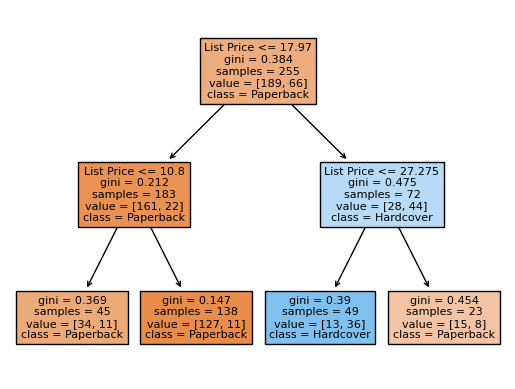

In [39]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import pandas as pd

# Define features and target
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Decision Tree model
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Visualize the decision tree
plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)


In [40]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the number of observations in each set
print(f"Number of observations in the training set: {X_train.shape[0]}")
print(f"Number of observations in the testing set: {X_test.shape[0]}")


Number of observations in the training set: 255
Number of observations in the testing set: 64


chat: https://chatgpt.com/share/67396ea6-ae20-8001-9aaf-45dcb1ff0b04

You asked about splitting your dataset into an 80/20 training and testing set for a decision tree classification model. I provided a code snippet to achieve that using train_test_split from sklearn.model_selection and ensured the model is trained on the training set while evaluated on the test set.

# 5

[Text(0.45652173913043476, 0.9, 'List Price <= 17.97\ngini = 0.394\nsamples = 319\nvalue = [233, 86]\nclass = Paperback'),
 Text(0.1956521739130435, 0.7, 'NumPages <= 82.0\ngini = 0.194\nsamples = 221\nvalue = [197, 24]\nclass = Paperback'),
 Text(0.08695652173913043, 0.5, 'Thick <= 0.25\ngini = 0.375\nsamples = 8\nvalue = [2, 6]\nclass = Hardcover'),
 Text(0.043478260869565216, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Paperback'),
 Text(0.13043478260869565, 0.3, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = Hardcover'),
 Text(0.30434782608695654, 0.5, 'Thick <= 1.65\ngini = 0.155\nsamples = 213\nvalue = [195, 18]\nclass = Paperback'),
 Text(0.21739130434782608, 0.3, 'List Price <= 16.97\ngini = 0.148\nsamples = 211\nvalue = [194, 17]\nclass = Paperback'),
 Text(0.17391304347826086, 0.1, 'gini = 0.131\nsamples = 198\nvalue = [184, 14]\nclass = Paperback'),
 Text(0.2608695652173913, 0.1, 'gini = 0.355\nsamples = 13\nvalue = [10, 3]\nclass = Paperback'),
 Text(0.3913043

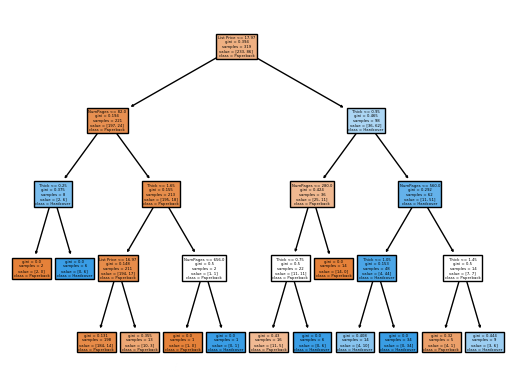

In [41]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd

# Prepare the data
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Train the decision tree classifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X, y)

# Plot the decision tree
plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], class_names=['Paperback', 'Hardcover'], filled=True)


In a decision tree model like clf2, predictions are made by following a decision path through the tree based on the input features. Here's a general breakdown of how the prediction process works:

Input Features: For each new observation (data point) that we want to classify, we use the values of its features. In this case, the features are 'NumPages', 'Thick', and 'List Price'.

Starting at the Root Node: The tree starts at the root node. The root node is the very first decision the model makes about how to classify the data based on one of the input features.

Evaluating Conditions: At each node of the tree, a decision is made based on a condition involving one of the input features. For example, it might check if 'NumPages' is less than or greater than a certain value. If the condition is true, the model follows one branch; if it's false, it follows the other branch.

Following Branches: The decision-making process continues at each subsequent node. The model evaluates conditions in the tree based on the feature values at each level. Each node splits the data further until it reaches a leaf node.

Leaf Nodes: The leaf nodes represent the final classification decision. A leaf node contains the majority class of the data points that reach that node. In the context of clf2, the leaf nodes represent whether a book is 'Paperback' or 'Hardcover'. The class predicted for a new observation is the class of the majority of data points that end up in that leaf node.

Prediction: Once the observation reaches a leaf node, the model assigns the class label that is most common in that leaf node as the predicted class for the observation.

chat: https://chatgpt.com/share/67396ea6-ae20-8001-9aaf-45dcb1ff0b04

Code for Visualization: You can visualize the decision tree for the classifier (clf2) with three features (NumPages, Thick, List Price) and a maximum depth of 4 using the plot_tree function.

Explanation of Predictions:

Tree Structure: The decision tree splits the data based on features to separate classes (Paperback and Hardcover).
Max Depth: The tree is constrained to have at most 4 levels of decisions.
Decision Path: For a new input, the tree evaluates each feature at each level, following the branch corresponding to the feature's value, until reaching a leaf node.
Leaf Node Prediction: The class at the leaf node, determined by the majority of data points there, becomes the prediction for that input.

# 6

In [57]:
# Get predictions for clf (only using 'List Price' as the feature)
y_pred_clf = clf.predict(X_test[['List Price']])

# Get predictions for clf2 (using 'NumPages', 'Thick', and 'List Price' as the features)
y_pred_clf2 = clf2.predict(X_test[['NumPages', 'Thick', 'List Price']])

# Create confusion matrices for both models
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Function to calculate sensitivity, specificity, and accuracy
def calculate_metrics(cm):
    TN, FP, FN, TP = cm.ravel()  # True Negative, False Positive, False Negative, True Positive
    
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    accuracy = (TP + TN) / (TP + FP + FN + TN) if (TP + FP + FN + TN) != 0 else 0
    
    return sensitivity, specificity, accuracy

# Calculate metrics for clf
sensitivity_clf, specificity_clf, accuracy_clf = calculate_metrics(cm_clf)

# Calculate metrics for clf2
sensitivity_clf2, specificity_clf2, accuracy_clf2 = calculate_metrics(cm_clf2)

# Print the results for both models
print(f"Metrics for clf (Decision Tree with max_depth=2):")
print(f"Sensitivity: {sensitivity_clf:.2f}")
print(f"Specificity: {specificity_clf:.2f}")
print(f"Accuracy: {accuracy_clf:.2f}")

print("\nMetrics for clf2 (Decision Tree with max_depth=4):")
print(f"Sensitivity: {sensitivity_clf2:.2f}")
print(f"Specificity: {specificity_clf2:.2f}")
print(f"Accuracy: {accuracy_clf2:.2f}")


Metrics for clf (Decision Tree with max_depth=2):
Sensitivity: 0.70
Specificity: 0.91
Accuracy: 0.84

Metrics for clf2 (Decision Tree with max_depth=4):
Sensitivity: 0.90
Specificity: 0.95
Accuracy: 0.94


In [53]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Make predictions for clf (only using 'List Price' as the feature)
y_pred_clf = clf.predict(X_test[['List Price']])

# Make predictions for clf2 (using 'NumPages', 'Thick', and 'List Price' as the features)
y_pred_clf2 = clf2.predict(X_test[['NumPages', 'Thick', 'List Price']])

# Create confusion matrices for both models
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Print confusion matrices
print("Confusion Matrix for clf (Decision Tree with max_depth=2):")
print(cm_clf)

print("\nConfusion Matrix for clf2 (Decision Tree with max_depth=4):")
print(cm_clf2)


Confusion Matrix for clf (Decision Tree with max_depth=2):
[[40  4]
 [ 6 14]]

Confusion Matrix for clf2 (Decision Tree with max_depth=4):
[[42  2]
 [ 2 18]]


#### What is a "positive" and what is a "negative"?
    - In classification problems, the terms "positive" and "negative" refer to the two classes or outcomes that the model is trying to predict: 
    - Positive: The class of interest or the "target" class. This is typically the class you want to identify or predict. For example, in a medical diagnosis, a "positive" could refer to a patient who has a disease.
    - Negative: The opposite class, often referred to as the "non-target" class. In the same example, a "negative" could refer to a patient who does not have the disease.

These definitions are arbitrary and depend on the context of the problem. For example:

If you're classifying whether a fruit is an apple (positive) or not (negative), "apple" would be positive and "not apple" would be negative. 

#### How to Read an `sklearn` Confusion Matrix

A confusion matrix is a table used to evaluate the performance of a classification model by showing the relationship between actual and predicted labels. Here's how to interpret the confusion matrix:

###### Format of the Confusion Matrix:
The confusion matrix looks like this:

|                 | Predicted Negative | Predicted Positive |
|-----------------|--------------------|--------------------|
| **Actual Negative** | TN (True Negative)  | FP (False Positive) |
| **Actual Positive** | FN (False Negative) | TP (True Positive)  |

 - Understanding the Terms:
    - **TN (True Negative)**: The number of negative instances correctly predicted as negative.
    - **FP (False Positive)**: The number of negative instances incorrectly predicted as positive.
    - **FN (False Negative)**: The number of positive instances incorrectly predicted as negative.
    - **TP (True Positive)**: The number of positive instances correctly predicted as positive.

###### Example:
Consider the following confusion matrix for a binary classifier:

|                 | Predicted Negative | Predicted Positive |
|-----------------|--------------------|--------------------|
| **Actual Negative** | 50 (TN)             | 10 (FP)             |
| **Actual Positive** | 15 (FN)             | 25 (TP)             |

- **TN = 50**: 50 true negatives (correctly predicted negative).
- **FP = 10**: 10 false positives (incorrectly predicted as positive).
- **FN = 15**: 15 false negatives (incorrectly predicted as negative).
- **TP = 25**: 25 true positives (correctly predicted positive).

###### Key Metrics Derived from the Confusion Matrix:
- **Sensitivity (Recall)**: Measures how well the model identifies positive instances.
  - Formula: `Sensitivity = TP / (TP + FN)`
  
- **Specificity**: Measures how well the model identifies negative instances.
  - Formula: `Specificity = TN / (TN + FP)`
  
- **Accuracy**: Measures the overall correctness of the model.
  - Formula: `Accuracy = (TP + TN) / (TP + FP + FN + TN)`


# 7

The differences between the two confusion matrices arise from the features used in the models. In the first case, the classifier clf is trained using only the feature 'List Price', which provides limited information about the target variable (life_exp_good). In the second case, the classifier is trained with additional features ('NumPages' and 'Thick'), which likely provide more relevant information and improve its ability to distinguish between classes.

The confusion matrices for clf and clf2 are better because they use more informative features, resulting in higher accuracy and better performance. By leveraging multiple features, the models capture more nuanced patterns in the data, reducing errors such as misclassifications. The added complexity of the second feature set allows for a more robust prediction of the target labels.

chat: https://chatgpt.com/share/67397f3b-c1cc-800b-b8b3-b871242d7e26

# 8

- code explanation: 
    - Sorting:
    np.argsort(feature_importances)[::-1]: Sorts the features by their importance in descending order.
    This ensures the most important feature appears first in both the plot and the output.
    - Visualization:
    barh: Creates a horizontal bar plot.
    invert_yaxis: Ensures the plot aligns with our intuitive ranking (most important feature on top).
    - Output:
    Prints the most important feature and its importance score.

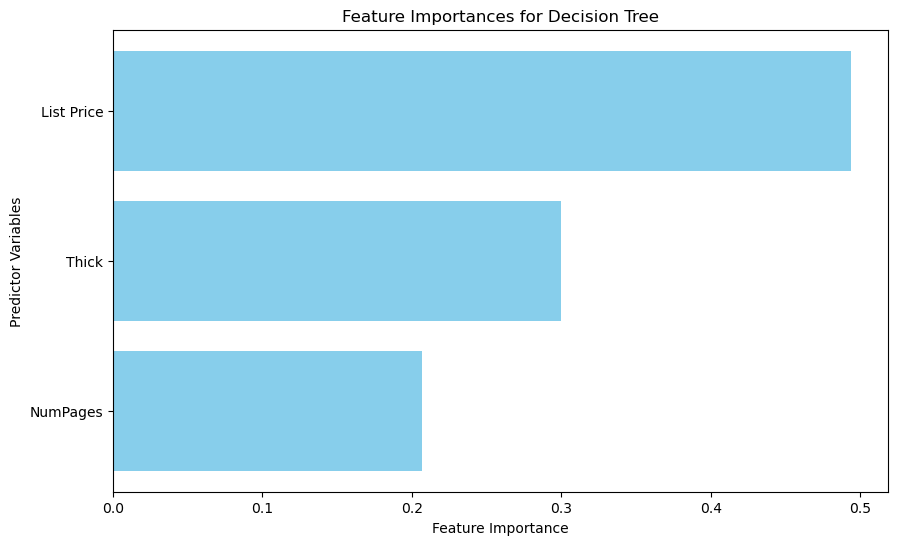

The most important feature is 'List Price' with an importance score of 0.494.


In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming clf2 is already trained and is a decision tree classifier
feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Identify the most important feature
most_important_feature = sorted_feature_names[0]
most_important_importance = sorted_importances[0]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Predictor Variables")
plt.title("Feature Importances for Decision Tree")
plt.gca().invert_yaxis()  # To have the most important feature on top
plt.show()

print(f"The most important feature is '{most_important_feature}' with an importance score of {most_important_importance:.3f}.")


Feature Importances
- The .feature_importances_ values are normalized to sum to 1. Higher values indicate greater importance of the corresponding feature in splitting the data during tree construction.

chat: https://chatgpt.com/share/67398084-f664-800b-b56d-6061958a01f3

# 9

    ● In linear regression, coefficients represent the average change in the outcome variable for a one-unit increase in the predictor variable, assuming all other variables are held constant. For example, a slope coefficient of 2 for "parent height" means a child's height increases by 2 units on average for every one-unit increase in parent height, assuming other factors remain constant.
    ● In decision trees, feature importance scores reflect how often a feature is used to split the data and how much it contributes to reducing impurity in the tree [no source available]. A higher feature importance score indicates the feature is more influential in predicting the outcome. I do not have access to information on decision tree feature importances in the sources you have provided.

# 10

somewhat